In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import load_digits # MNIST 손글씨 데이터셋을 사용하기 위해 import 한다.
from sklearn.neighbors import KNeighborsClassifier # kNN
from sklearn.svm import SVC # SVM
from sklearn.tree import DecisionTreeClassifier # 의사결정 트리
# 하드/소프트 보팅을 계산하기 위해 import 한다.
from sklearn.ensemble import VotingClassifier 


손글씨 데이터 불러오기

In [3]:
mnist = load_digits() # 사이킷 런이 제공하는 MNIST 손글씨 데이터를 불러온다.
features, labels = mnist.data, mnist.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
print('학습데이터 개수: {}, 테스트데이터 개수: {}'.format(X_train.shape[0], X_test.shape[0]))

학습데이터 개수: 1437, 테스트데이터 개수: 360


단일 모델의 정확도 측정  
앙상블 정확도를 측정하기에 앞서서 단일 모델들의 정확도를 KNN ,SCV 의사 결정 트리 분류기를 만들어 정확도를 계산한다.

In [5]:
# KNN
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train,y_train)
knn_predict = knn.predict(X_test)
print('정확도: {:6.2%}'.format(accuracy_score(y_test,knn_predict)))

정확도: 83.06%


In [6]:
# svm
svm = SVC(C=0.1,gamma=0.003,random_state=35, probability=True).fit(X_train,y_train)
svm_predict = svm.predict(X_test)
print('정확도: {:6.2%}'.format(accuracy_score(y_test, svm_predict)))

정확도: 89.17%


In [7]:
# 의사 결정 트리
dtree = DecisionTreeClassifier(random_state=35, max_depth=8).fit(X_train,y_train)
dtree_predict = dtree.predict(X_test)
print('정확도 : {:6.2%}'.format(accuracy_score(y_test,dtree_predict)))

정확도 : 85.56%


하드 보팅  
일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내린다.

In [8]:
hv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], 
                          weights=[1,1,1] , voting='hard').fit(X_train,y_train)
hv_predict = hv_clf.predict(X_test)
print('하드 보팅 정확도 : {:6.2%}'.format(accuracy_score(y_test,hv_predict)))

하드 보팅 정확도 : 91.11%


소프트 보팅  
각 분류값별 확률을 더해준 값을 점수로 사용해 최대 점수를 가진 분류값으로 결론을 내린다.

확률 합계

In [9]:
# predict_proba() 메소드로 분류 모델이 각 클래스(타겟 , 레이블, 실제값)의 확률을 계산한다.
knn_probar = knn.predict_proba(X_test)
# print(len(knn_probar))
print(knn_probar[0])
print('확률 합계 : {}'.format(knn_probar[0].sum()))

[0.00334448 0.17391304 0.09698997 0.04013378 0.01672241 0.30769231
 0.00668896 0.14046823 0.17391304 0.04013378]
확률 합계 : 1.0


In [10]:
svm_probar = svm.predict_proba(X_test)
print(svm_probar[0])
print('확률 합계 : {}'.format(svm_probar[0].sum())) # 부동소수점연산을 하다보면 0.00000000000002 or 3 이 나올수 있다 .

[0.01267948 0.09863469 0.04768392 0.03334157 0.03255262 0.31947241
 0.01463234 0.06373372 0.25506758 0.12220168]
확률 합계 : 1.0000000000000002


In [11]:
dtree_probar = dtree.predict_proba(X_test)
print(dtree_probar[0])
print('확률 합계 : {}'.format(dtree_probar[0].sum()))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
확률 합계 : 1.0


In [12]:
sv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], 
                          weights=[1,1,1] , voting='soft').fit(X_train,y_train)
sv_predict = sv_clf.predict(X_test)
print('소프트 보팅 정확도 : {:6.2%}'.format(accuracy_score(y_test,sv_predict)))

소프트 보팅 정확도 : 89.17%


단일 모델과 앙상블 모델의 정확도 비교 시각화

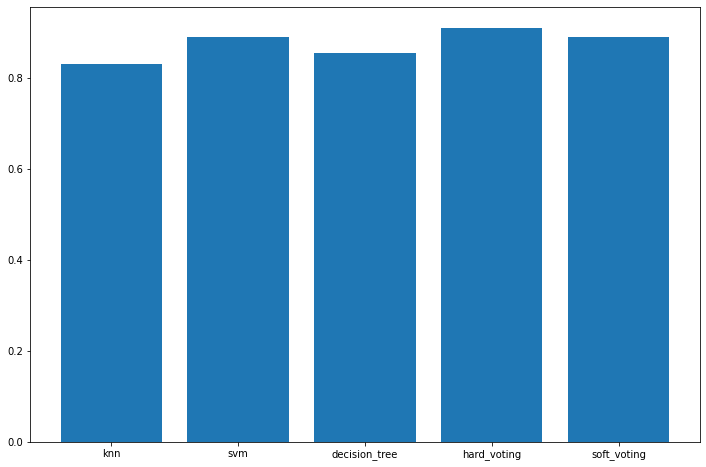

In [15]:
plt.figure(figsize=(12,8))
x = np.arange(5)
plt.bar(x, height=[
    accuracy_score(y_test, knn_predict),
    accuracy_score(y_test, svm_predict),
    accuracy_score(y_test, dtree_predict),
    accuracy_score(y_test, hv_predict),
    accuracy_score(y_test, sv_predict)
])
plt.xticks(x,['knn','svm','decision_tree','hard_voting','soft_voting'])
plt.show()